# Finding the Best Two Markets to Advertise In

We work for a e-learning company offering coding classes. Most of our courses are about web and mobile development, but we also cover data science, game development, etc. We are in the process of promoting our product and we'd like to invest some money in advertising. 

To find the two best markets to promote our product is our goal in this project.

## Understanding the Data

To achieve our goal, we could organize surveys for several different markets to find out which would be the best choices for advertising. However, this is very expensive, and it's a good decision to explore cheaper options first.

We can do a search for data that is already in existence that might be relevant to our purpose. Data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969), a free e-learning platform offering courses on web development, is a good candidate. Since they run a [popular Medium publication](https://medium.freecodecamp.org/)(over 400,000 followers), their survey attracted new coders with a variety of interests (not just web development). This is ideal for the purpose of our analysis.

[In this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey), the survey data is publicly available.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# to avoid display of truncated columns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

Pandas is unable to figure out the datatypes of each and every column. As shown by - DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False. interactivity=interactivity, compiler=compiler, result=result).

In order to suppress this warning, low_memory option of "read_csv" method, has been set to False.

These columns are ID or survey timestamp columns, and are therefore omitted from the start - ID.x, ID.y, NetworkID, Part1EndTime, Part1StartTime, Part2EndTime, Part2StartTime

In [2]:
fcc = pd.read_csv('D:/2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

# drop un-necessary columns from the dataset
fcc = fcc.drop(columns = ["ID.x", "ID.y", "NetworkID", "Part1EndTime", 
                           "Part1StartTime", "Part2EndTime", "Part2StartTime"])

# display number of rows and columns in dataset
print("Total Rows in survey data :",fcc.shape[0])
print("Total Columns in survey data :",fcc.shape[1])

Total Rows in survey data : 18175
Total Columns in survey data : 129


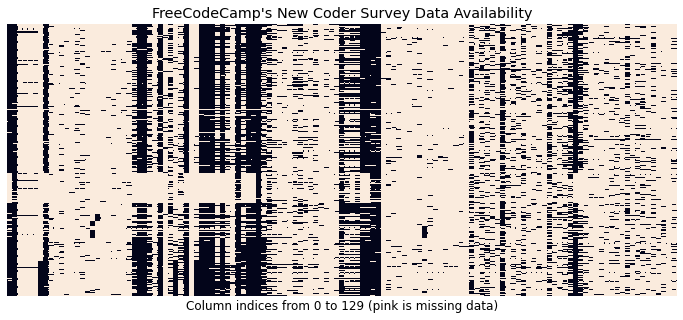

In [3]:
plt.subplots(figsize = (12, 5))
sns.heatmap(fcc.isnull(), cbar = False)
plt.xticks([])
plt.yticks([])
plt.xlabel("Column indices from 0 to 129 (pink is missing data)", fontsize = "large")
plt.title("FreeCodeCamp's New Coder Survey Data Availability", fontsize = "x-large")
plt.show()

There seem to be many columns with blank/zero values. Perhaps it will help to identify which fields are useful for the analysis and which fields can be ignored if we are familiar with each column and what exactly it captures.

In [4]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,...,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,...,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,...,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,...,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Sample Representativity

As we mentioned above, most of the courses we offer are related to web and mobile development, but we also cover a lot of other areas, such as data science, game development, and so on. For the purposes of our analysis, we want to answer questions about a population of new programmers who are interested in the subjects we are teaching. The questions we have in mind are:

* Where do these new programmers live?
* What are the locations that have the largest number of new coders?
* How much money the new coders are willing to spend on their learning experience.

Before we start analyzing the sample data we have, we need to make sure that it's representative of the population we're interested in, and that it includes the categories we need.

In [5]:
# in the following rows, taking the most popular subjects and making them easier to analyze and work with
job_interest = pd.DataFrame(fcc['JobRoleInterest'].value_counts(normalize = True) * 100)
job_interest = job_interest.reset_index()
job_interest = job_interest.rename(columns = {'index': 'JobRoleInterst',
                                              'JobRoleInterest': 'Percentage'})
job_interest.head(20)

,JobRoleInterst,Percentage
0,Full-Stack Web Developer,11.770595
1,Front-End Web Developer,6.435927
2,Data Scientist,2.173913
3,Back-End Web Developer,2.030892
4,Mobile Developer,1.673341
5,Game Developer,1.630435
6,Information Security,1.315789
7,"Full-Stack Web Developer, Front-End Web Deve...",0.915332
8,"Front-End Web Developer, Full-Stack Web Deve...",0.800915
9,Product Manager,0.786613


The information in the table above is pretty granular, but from a quick scan it looks like the following:

* Many people are interested in web development (full-stack, front-end, and back-end).
* A small number of people are interested in mobile phone development.
* A small number of people are interested in areas other than web development and mobile development.

It's also interesting that many people have multiple interests. It would be useful to get a better picture of how many people are interested in a single topic and how many have mixed interests. So in the next block of code, we'll do the following:

- To find the number of options for each attendee, split each string in the `JobRoleInterest` column.
- Since we cannot split NA values, we will first drop the NA values.
- Create a table of frequencies for the variable that describes the number of options.

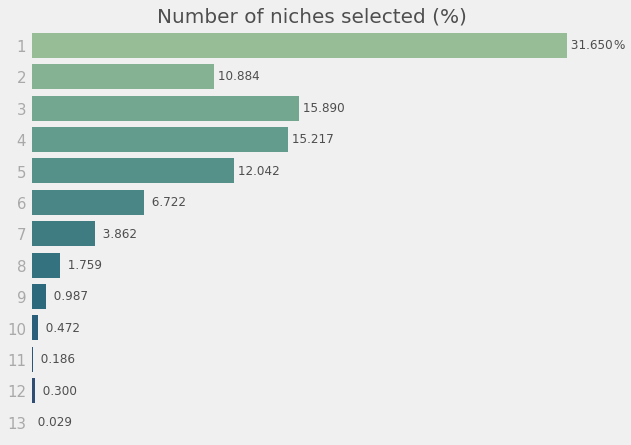

In [6]:
splitted_interests = fcc[fcc['JobRoleInterest'].notnull()]
split = splitted_interests['JobRoleInterest'].str.split(',')

frequency = {}
for val in split:
    length = len(val)
    if length not in frequency:
        frequency[length] = 1
    else:
        frequency[length] +=1
        
sum_freq = sum(frequency.values())
for index, val in zip(frequency, frequency.values()):
    frequency[index] = val / sum_freq * 100
    
# percentage of number of niches selected
freq = pd.DataFrame(frequency, index = range(1))
freq = freq.transpose().reset_index().rename(columns = {
                                                        'index': 'num_niches',
                                                        0: 'percentage' 
                                                        })

style.use('fivethirtyeight')
plt.subplots(figsize = (9,7))
ax = sns.barplot( x = 'percentage', y = 'num_niches', 
                 data = freq, palette = 'crest', orient = 'h')
plt.xlabel('')
plt.ylabel('')
plt.yticks( color = 'darkgrey')
plt.xticks([])
plt.yticks(size = 15)
initialx=0
plt.text(34.4,0.1, s = '%', color = '#4E4E4E', size = 12)

for p in ax.patches:
    ax.text( p.get_width(),initialx+p.get_height()/8,'{:7.3f}'.format(p.get_width()), color = '#4E4E4E', size = 12)
    initialx+=1
    

plt.title(y = 1.005, label ='Number of niches selected (%)',
          size = 20, color = '#4E4E4E')
plt.show()

It turns out that the vast majority of students have mixed interests, while only 31.65% have a clear idea of what programming niche they want to work in. However, considering the fact that we offer courses on a variety of topics, the fact that new coders have mixed interests could actually be a good thing for us.

Let's see how many respondents chose at least one of these two options, since our courses focus on web and mobile development.

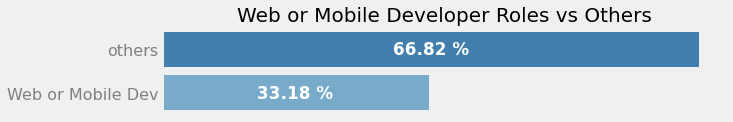

In [7]:
web_or_mobile = (fcc.JobRoleInterest.str.contains('Web Developer|Mobile Developer') & fcc.JobRoleInterest.notnull())
web_or_mobile = web_or_mobile.map({False: 'others', 
                                   True: 'Web or Mobile Dev'})

web_or_mobile.value_counts(normalize = True) * 100

fig, ax = plt.subplots(figsize = (9, 1.5))

sns.barplot(ax = ax, y = web_or_mobile.value_counts().index, 
            x = web_or_mobile.value_counts(normalize = True), palette = "tab20c")
for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    ax.text(w * .5, p.get_y() + 0.5 * h, str(round(w*100,2))+" %",
            ha='center', va='center', fontsize="large", color = "white", fontweight="bold")

ax.set_title("Web or Mobile Developer Roles vs Others", fontsize = 20)
ax.set_xticks([])
plt.yticks(size = 16, color = 'grey')
ax.set_xlabel("")
sns.despine()
plt.show()

It turns out that vast majority of people in this survey (one third) are interested in either web or mobile development. These numbers give us good reason to believe that this sample is representative of our target population. We want to promote our courses to people interested in all sorts of programming niches, but especially web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

## New Coders - Locations and Densities

The dataset informs about the location of each participant on a country level. The `CountryCitizen` variable describes each respondent's country of origin, and the `CountryLive` variable describes each respondent's country of residence (which may be different from their country of origin).

For our analysis, we're interested in where people actually live at the time we run the ads, so we'll work with the `CountryLive` variable. In other words, we are interested in where people are at the moment, not where they are at the moment of birth.

We can think of each country as a separate market because the dataset provides country-level information. This means that we can formulate our goal as finding the two best countries in which to advertise.

One indication of good markets is the amount of potential clients - the more potential clients in the market, the better. If our advertisements can convince 10% of the 5000 potential customers in country A to buy our product, that is better than convincing 100% of the 30 potential customers in country B.

In [8]:
# drop all rows where coders haven't responded to preferred Job Role Interest Question
fcc = fcc.dropna(subset = ["JobRoleInterest"])

(fcc['CountryLive'].value_counts(normalize = True) * 100).head(15)

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Name: CountryLive, dtype: float64

45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.72%, which is not too far from the United Kingdom (4.60%) or Canada (3.80%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

The `MoneyForLearning` column describes, in U.S. dollars, the amount of money spent by participants from the time they started coding to the time they completed the survey. We charge $59/month, so we want to know how much each student is spending each month.

We also decided that it made sense to focus on just four countries: USA, India, UK, and Canada. There are two reasons for this decision:

These are the countries with the highest absolute frequencies in our sample. This means that we have a reasonable amount of data for each of them.
Our courses are written in English, and English is an official language in all four of these countries. The more people who can speak English, the better chance we have of targeting the right people with our ads.

In [9]:
# Figuring out how much money people spend for learning
fcc = fcc[fcc["CountryLive"].isin(["United States of America", "India", "United Kingdom", "Canada"])]
# to avoid division by zero
fcc['MonthsProgramming'] = fcc['MonthsProgramming'].replace({0 : 1})
fcc['money_per_month'] = fcc['MoneyForLearning'] / fcc['MonthsProgramming']
fcc = fcc.dropna(subset = ['money_per_month'])

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having `NA` values for the `CountryLive` column, and check out if we still have enough data for the four countries that interest us.

In [10]:
fcc = fcc.dropna(subset = ['CountryLive'])
pd.DataFrame(fcc.groupby('CountryLive').money_per_month.mean().sort_values(ascending = False))

,money_per_month
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


Compared to the values we see for India, the results for the UK and Canada are somewhat surprising. If we're looking at some socio-economic measures (such as [GDP per capita](https://bit.ly/2I3cukh)), we would intuitively expect people in the UK and Canada to spend more on learning than people in India.

It could be that we don't have enough representative data for the UK and Canada. It could also be that we have some outliers (perhaps from incorrect survey responses) that make the mean too high for India, or too low for the UK and Canada. Or it could be that the results are the right ones.

## Dealing with Extreme Outliers

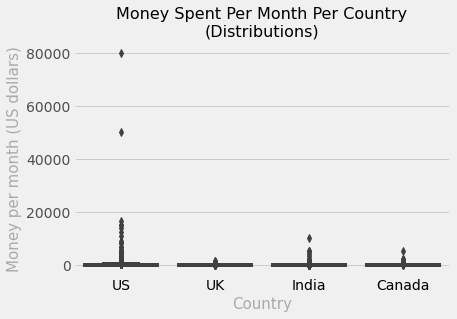

In [11]:
# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = fcc)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)', size = 15, color = 'darkgrey')
plt.xlabel('Country', size = 15, color = 'darkgrey')
plt.yticks(color = '#4E4E4E')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month 50,000 or more for learning. thi is not impossible, but it seems extremely unlikely, so we will remove every value that goes over 20,000 per month.

In [12]:
# Isolate only those participants who spend less than 10000 per month
fcc = fcc[fcc['money_per_month'] < 20000]

Now let's recompute the mean values and plot the box plots again.

In [13]:
pd.DataFrame(fcc.groupby('CountryLive').mean()['money_per_month'].sort_values(ascending = False))

,money_per_month
CountryLive,
United States of America,183.800110
India,135.100982
Canada,113.510961
United Kingdom,45.534443


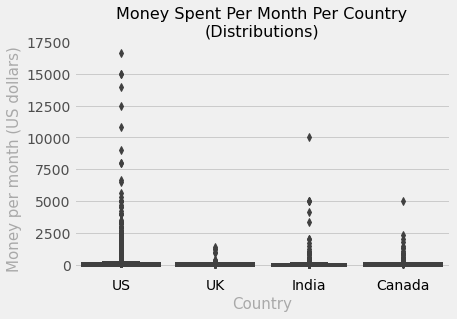

In [14]:
# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = fcc)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)', size = 15, color = 'darkgrey')
plt.xlabel('Country', size = 15, color = 'darkgrey')
plt.yticks(color = '#4E4E4E')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these data points to see if we can find anything relevant.

In [15]:
# Inspect the extreme outliers for India
india_outliers = fcc[
    (fcc['CountryLive'] == 'India') & 
    (fcc['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,...,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,...,NaN,NaN,NaN,NaN,bachelor's degree,Aerospace and Aeronautical Engineering,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,bachelor's degree,Electrical and Electronics Engineering,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,...,NaN,NaN,NaN,1.0,bachelor's degree,Communications,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It appears that neither participant attended a boot camp. Overall, whether these people really spent that much money learning is really hard to tell from the data. The actual question of the survey was: *In addition to college tuition, how much money have you spent so far learning to code (in US dollars)?*, so they may have misunderstood and thought that college tuition was included. Removing these rows seems safer.

In [16]:
# Remove the outliers for India
fcc = fcc.drop(india_outliers.index) 

Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [17]:
# Examine the extreme outliers for the US
us_outliers = fcc[
    (fcc['CountryLive'] == 'United States of America') & 
    (fcc['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,...,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,...,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,bachelor's degree,Anthropology,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,...,NaN,1.0,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,bachelor's degree,Biology,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,bachelor's degree,Business Administration and Management,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,...,NaN,1.0,NaN,1.0,"professional degree (MBA, MD, JD, etc.)",Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,bachelor's degree,Economics,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,...,1.0,1.0,NaN,NaN,master's degree (non-professional),Chemical Engineering,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,associate's degree,Computer Programming,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,...,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,12500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Of these 11 extreme outliers, six people attended bootcamps, which justifies the large amount of money spent on learning. For the other five, it's hard to determine from the data where they could have spent so much money on training. As a result, we're going to remove the rows where respondents indicated that they were spending 6,000 a month but had never attended a boot camp.

The data also shows that eight respondents had been coding for no more than three months at the time of their survey completion. They most likely paid a large amount of money for a bootcamp that was supposed to last several months, so the amount of money spent per month is unrealistic and should be significantly lower (since they probably didn't spend anything for the next few months after the survey). Consequently, we'll remove each of these eight outliers.

In the next block of code, let's remove participants who:

* Didn't attend any bootcamps.
* Had been coding for three months or less at the time they completed the survey.

In [18]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = fcc[
    (fcc['CountryLive'] == 'United States of America') & 
    (fcc['money_per_month'] >= 6000) &
    (fcc['AttendedBootcamp'] == 0)
]

fcc = fcc.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = fcc[
    (fcc['CountryLive'] == 'United States of America') & 
    (fcc['money_per_month'] >= 6000) &
    (fcc['MonthsProgramming'] <= 3)
]

fcc = fcc.drop(less_than_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [19]:
# Examine the extreme outliers for Canada
canada_outliers = fcc[
    (fcc['CountryLive'] == 'Canada') & 
    (fcc['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,...,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,...,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This participant had been coding for no more than two months when he completed the survey, similar to some of the US respondents. He seems to have paid a lot of money to enroll in a bootcamp at the beginning. Then he probably didn't spend anything for a few months after the survey. We'll remove this outlier here, using the same approach as for the US.

In [20]:
# Remove the extreme outliers for Canada
fcc = fcc.drop(canada_outliers.index)

Let's recompute the mean values and generate the final box plots.

In [21]:
pd.DataFrame(fcc.groupby('CountryLive').mean()['money_per_month'].sort_values(ascending = False))

,money_per_month
CountryLive,
United States of America,142.654608
Canada,93.065400
India,65.758763
United Kingdom,45.534443


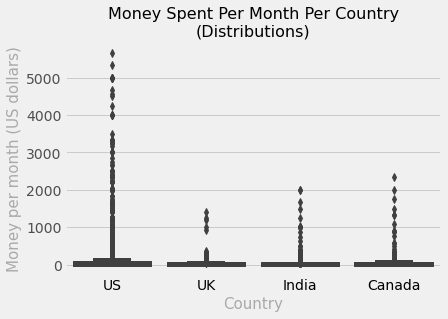

In [22]:
# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = fcc)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)', size = 15, color = 'darkgrey')
plt.xlabel('Country', size = 15, color = 'darkgrey')
plt.yticks(color = '#4E4E4E')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Two Best Markets

Obviously, one country where we should do a lot of advertising is the USA. There are a lot of new coders living there, and they are willing to pay a good amount of money every month (about 143 dollars).

We are selling subscriptions at a price of 59 per month, and Canada seems to be the best second choice because people there are willing to pay rougly 93 per month, compared to India (66) and the United Kingdom (45).

The data strongly suggests against advertising in the United Kingdom, but let's look at India again before choosing Canada as our second option:

* 59 does not seem like expensive sum for people in India since they spend on average 66 per month.
* In India, we have almost twice as many potential customers as we do in Canada:

In [23]:
# Frequency table for the 'CountryLive' column
fcc['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So the choice between Canada and India is not crystal clear. Even though the choice of Canada is more tempting, there is a good chance that India might be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. By splitting the ad budget in various combinations, we can advertise in the US, India and Canada:

    * 60% for the US, 25% for India, 15% for Canada.
    * 50% for the US, 30% for India, 20% for Canada, etc.
2. Advertise only in the United States and India, or in the United States and Canada. Again, it makes sense to split the ad budget unevenly. For example:

    * 70% for the US and 30% for India.
    * 65% for the US and 35% for Canada, etc.
3. Advertise only in the US.

Although it seems more tempting to choose Canada, there is a good chance that India might actually be a better choice because of the large number of potential customers. They may want to run some additional surveys in India and Canada. Then get back to us to analyze the new survey data.

## Conclusion

In this project, in order to find the two best markets to advertise in, we analyzed survey data from new programmers. The USA would be a good market to advertise in, was the only solid conclusion we came to.

It wasn't clear what to choose between India and Canada for the second best market. It was decided to send the results to the marketing team so that the can make the best choice based on their expertise.